In [1]:
#the usuals
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2


In [99]:
#bringing in the helper functions
from helper import all_keys,data_to_df,concat_to_df,fill_data_vals,json_read

In [3]:
path='/home/rachel/Galvanize/capston1/data/'

In [50]:
df = pd.read_json(path+'COAL.json', orient = 'index').iloc[:1000,:]

In [5]:
df.head()

,name,units,f,description,copyright,source,iso3166,geography,start,end,last_updated,geoset_id,data,lat,lon,geography2,latlon,lat2,lon2,latlon2
COAL.ASH_CONTENT.OH-3.A,Ash content : Ohio : electric utility cogen : ...,percent,A,Power plants owned by regualted electric utili...,None,"EIA, U.S. Energy Information Administration",USA-OH,USA-OH,2009,2016,2017-07-05T12:04:11-04:00,COAL.ASH_CONTENT.3.A,"{'2016': 0, '2015': 0, '2014': 0, '2013': 0, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
COAL.ASH_CONTENT.MS-2.Q,Ash content : Mississippi : electric utility n...,percent,Q,Power plants owned by regulated electric utilt...,None,"EIA, U.S. Energy Information Administration",USA-MS,USA-MS,2008Q1,2017Q1,2017-07-05T12:04:11-04:00,COAL.ASH_CONTENT.2.Q,"{'2017Q1': 12.837797064489, '2016Q4': 14.03824...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
COAL.ASH_CONTENT.MO-98.Q,Ash content : Missouri : electric power (total...,percent,Q,Power plants owned by companies whose primary ...,None,"EIA, U.S. Energy Information Administration",USA-MO,USA-MO,2008Q1,2017Q1,2017-07-05T12:04:11-04:00,COAL.ASH_CONTENT.98.Q,"{'2017Q1': 4.7233649747318, '2016Q4': 4.716206...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
COAL.ASH_CONTENT.MS-10.Q,Ash content : Mississippi : other industrial :...,percent,Q,The U.S. coal data is collected and prepared f...,None,"EIA, U.S. Energy Information Administration",USA-MS,USA-MS,2000Q1,2017Q1,2017-07-05T12:04:11-04:00,COAL.ASH_CONTENT.10.Q,"{'2017Q1': 0, '2016Q4': 0, '2016Q3': 0, '2016Q...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
COAL.ASH_CONTENT.NEW-1.Q,Ash content : New England (total) : electric u...,percent,Q,Power plants owned by regulated electric utilt...,None,"EIA, U.S. Energy Information Administration",NaN,USA-CT+USA-MA+USA-ME+USA-NH+USA-RI+USA-VT,2008Q1,2017Q1,2017-07-05T12:04:11-04:00,COAL.ASH_CONTENT.1.Q,"{'2017Q1': 8.4, '2016Q4': 7.68, '2016Q3': 7.87...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

The coal json file , when put into a data frame has 169316 rows

useful data is nested in a dictionary inside the data column of each row.

The functions from the helper.py, used below, expands the the df to include columns of all the possible keys in the data dictionaries , and fills rows with the corresponding values from the dictionary.

Trying this pipeline with the full coal df seemed to never want to complete and made my computer sound like it was going lift off my desk. so i decided to limit the rows by parsing the name column for anything to do with coal ash

In [8]:
coal_ash_df = df[df['name'].str.match('Ash content')]

In [10]:
coal_ash_df.shape


(120, 20)

In [13]:
# pipline in helper.py

#creating a set of all possible keys in my data column
k = all_keys(coal_ash_df)

In [22]:
# creating a new column fro each key 
new_df = data_to_df(list(k),coal_ash_df)
new_df = concat_to_df(df,new_df)

In [15]:
#filling the columns with the values
coal_ash_df = fill_data_vals(new_df)

In [21]:
coal_ash_df.head()
#tada! a bunch of new columns with yearly measurments inside (al you see is nans in this head statement becasue the data dictionaries are diffent sizes and the columns are all possible keys)

,name,units,f,description,copyright,source,iso3166,geography,start,end,...,2011Q3,2013Q3,2005,2015,2016Q3,2004Q2,2008Q3,2014Q4,2013Q2,2004
0,Ash content : Ohio : electric utility cogen : ...,percent,A,Power plants owned by regualted electric utili...,None,"EIA, U.S. Energy Information Administration",USA-OH,USA-OH,2009,2016,...,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0
1,Ash content : Mississippi : electric utility n...,percent,Q,Power plants owned by regulated electric utilt...,None,"EIA, U.S. Energy Information Administration",USA-MS,USA-MS,2008Q1,2017Q1,...,13.945172,13.327886,0.0,0.0,13.899791,0.00,15.407491,13.237455,11.335796,0.0
2,Ash content : Missouri : electric power (total...,percent,Q,Power plants owned by companies whose primary ...,None,"EIA, U.S. Energy Information Administration",USA-MO,USA-MO,2008Q1,2017Q1,...,5.054770,4.841968,0.0,0.0,4.785508,0.00,5.198400,4.880440,4.828248,0.0
3,Ash content : Mississippi : other industrial :...,percent,Q,The U.S. coal data is collected and prepared f...,None,"EIA, U.S. Energy Information Administration",USA-MS,USA-MS,2000Q1,2017Q1,...,NaN,8.220000,0.0,0.0,0.000000,8.98,8.690000,7.580000,8.480000,0.0
4,Ash content : New England (total) : electric u...,percent,Q,Power plants owned by regulated electric utilt...,None,"EIA, U.S. Energy Information Administration",NaN,USA-CT+USA-MA+USA-ME+USA-NH+USA-RI+USA-VT,2008Q1,2017Q1,...,7.332769,7.721398,0.0,0.0,7.876819,0.00,7.005193,7.683500,8.089866,0.0


the f column informs you if the row records anually or quarterly

In [23]:
coal_ash_df["f"].head()

0    A
1    Q
2    Q
3    Q
4    Q
Name: f, dtype: object

In [29]:
# i check to see how many rows per state there where
len(coal_ash_df.loc[coal_ash_df['iso3166']=='USA-OH'])

10

In [30]:
#lets see what information they provide for an individual state
coal_ash_df.loc[coal_ash_df['iso3166']=='USA-OH']['name']

0      Ash content : Ohio : electric utility cogen : ...
7      Ash content : Ohio : electric utility : quarterly
8      Ash content : Ohio : other industrial : quarterly
11     Ash content : Ohio : independent power produce...
14     Ash content : Ohio : electric power (total) : ...
15     Ash content : Ohio : electric power (total) : ...
24             Ash content : Ohio : coke plants : annual
25          Ash content : Ohio : coke plants : quarterly
26     Ash content : Ohio : independent power produce...
128       Ash content : Ohio : electric utility : annual
Name: name, dtype: object

It looks like there is ash content break downs for individual sectors.

In [31]:
coal_ash_df.shape

(1000, 106)

In [32]:
# filtering out duplicates by choosing to just look at anual reporting
coal_ash_df = coal_ash_df[coal_ash_df['f']=='A']

In [33]:
coal_ash_df.shape


(502, 106)

In [36]:
# there are 86 columns of years
coal_ash_df.iloc[:,-86:].head()

,2004Q3,2006Q4,2013Q4,2007Q1,2015Q2,2012Q4,2005Q1,2001Q3,2007,2001,...,2011Q3,2013Q3,2005,2015,2016Q3,2004Q2,2008Q3,2014Q4,2013Q2,2004
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.72,0.0,...,0.0,0.0,7.71,7.15,0.0,0.0,0.0,0.0,0.0,6.68
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,8.49,0.0,0.0,0.0,0.0,0.0,0.00
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,8.10,0.0,0.0,0.0,0.0,0.0,0.00
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,7.39,0.0,0.0,0.0,0.0,0.0,0.00


I have noticed that some rows are groups of states. Rows that represent individual states have a non null value in  iso3166 colum so below i am makeing a subset df of just coal ash reporting by state with only useful columns [name,f, description, iso3166, and the last 86 columns which are the data]


In [37]:
# filtering for individual states
coal_ash_df.dropna(subset=['iso3166'],inplace=True)
coal_ash_df.shape

/home/rachel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(450, 106)

In order to make a new data frame with just the columns I want, Im going to split and recombind

In [38]:
# just name and state
coal_ash_df_1= coal_ash_df.filter(items=['name','iso3166'])
coal_ash_df_1.shape

(450, 2)

In [39]:
#just year columns
coal_ash_df_2 = coal_ash_df.iloc[:,-86:]
coal_ash_df_2.shape

(450, 86)

In [40]:
# concatinating the two sets of columns to get only useful info
ash_anual_state_df = coal_ash_df_1.join(coal_ash_df_2)
ash_anual_state_df.shape

(450, 88)

In [41]:
# filtering for just anual data. The new way!
anual_cols = [c for c in ash_anual_state_df.columns if not 'Q' in c]
#lets sort the years while we are at it
ash_anual_state_df = ash_anual_state_df[sorted(anual_cols)]


In [42]:
ash_anual_state_df.shape

(450, 19)

re filtering for ash data 

In [53]:
ash_state = ash_anual_state_df[ash_anual_state_df['name'].str.contains('Ash content')]
ash_state.shape

(120, 19)

In [57]:
ash_state

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,geography,name
COAL.ASH_CONTENT.OH-3.A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.70,6.60,7.53,0.00,0.00,0.00,0.00,0.00,USA-OH,Ash content : Ohio : electric utility cogen : ...
COAL.ASH_CONTENT.MS-2.Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA-MS,Ash content : Mississippi : electric utility n...
COAL.ASH_CONTENT.MO-98.Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA-MO,Ash content : Missouri : electric power (total...
COAL.ASH_CONTENT.MS-10.Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA-MS,Ash content : Mississippi : other industrial :...
COAL.ASH_CONTENT.NEW-1.Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA-CT+USA-MA+USA-ME+USA-NH+USA-RI+USA-VT,Ash content : New England (total) : electric u...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COAL.ASH_CONTENT.PA-9.A,0.0,0.0,5.6,5.92,6.17,5.94,5.99,6.43,6.34,6.11,6.84,6.84,7.26,7.01,6.91,6.87,6.74,USA-PA,Ash content : Pennsylvania : coke plants : annual
COAL.ASH_CONTENT.NE-98.A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.17,5.18,4.96,5.03,4.99,5.19,5.24,5.38,5.31,USA-NE,Ash content : Nebraska : electric power (total...
COAL.ASH_CONTENT.NE-98.Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA-NE,Ash content : Nebraska : electric power (total...
COAL.ASH_CONTENT.MO-8.A,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,8.48,8.51,8.39,8.68,9.31,9.31,8.84,8.59,8.48,USA-MO,Ash content : Missouri : commercial and instit...


In [58]:
#averageing across sectors grouping by state/region
ash_anual_groupy = ash_anual_state_df.groupby(['geography']).mean().T
ash_anual_groupy

geography,USA-AZ+USA-CO+USA-ID+USA-MT+USA-NM+USA-NV+USA-UT+USA-WY,USA-CA+USA-OR+USA-WA,USA-CT+USA-MA+USA-ME+USA-NH+USA-RI+USA-VT,USA-MO,USA-MS,USA-MT,USA-NC,USA-ND,USA-NE,USA-NH,USA-NJ,USA-NM,USA-NV,USA-NY,USA-OH,USA-OK,USA-OR,USA-PA
2000,0.000000,NaN,0.000000,0.00,NaN,0.000,0.0000,0.000,NaN,NaN,NaN,NaN,NaN,0.0000,0.000,0.000000,NaN,0.000000
2001,0.000000,NaN,0.000000,0.00,NaN,0.000,0.0000,0.000,NaN,NaN,NaN,NaN,NaN,0.0000,0.000,0.000000,NaN,0.000000
2002,3.845000,NaN,6.320000,0.00,NaN,0.000,3.6100,0.000,NaN,NaN,NaN,NaN,NaN,5.1900,8.730,5.740000,6.490000,6.070000
2003,3.670000,NaN,6.120000,0.00,NaN,0.000,3.5600,0.000,NaN,NaN,NaN,NaN,NaN,5.3800,6.080,5.660000,7.750000,6.296667
2004,4.000000,NaN,6.680000,0.00,NaN,0.000,3.6650,0.000,NaN,NaN,NaN,NaN,NaN,6.4900,6.180,6.390000,7.290000,6.663333
2005,3.705000,NaN,7.710000,0.00,NaN,0.000,4.0100,0.000,NaN,NaN,NaN,NaN,NaN,6.3500,6.810,6.510000,0.000000,6.716667
2006,3.925000,NaN,7.410000,0.00,NaN,0.000,3.8150,0.000,NaN,NaN,NaN,NaN,NaN,5.8800,6.420,6.700000,NaN,6.373333
2007,3.825000,NaN,6.720000,0.00,NaN,0.000,3.7700,0.000,NaN,NaN,NaN,NaN,NaN,5.7700,6.470,6.540000,NaN,6.486667
2008,10.126627,8.556667,6.272129,8.48,15.92,9.330,8.9025,9.055,5.17,6.77,6.873333,21.96,5.72,7.7520,8.425,8.543333,4.740000,18.160000
2009,9.715893,7.683333,7.130703,8.51,15.24,9.380,9.2725,9.370,5.18,7.41,6.466667,21.98,5.02,7.1500,7.962,8.110000,4.830000,15.544286


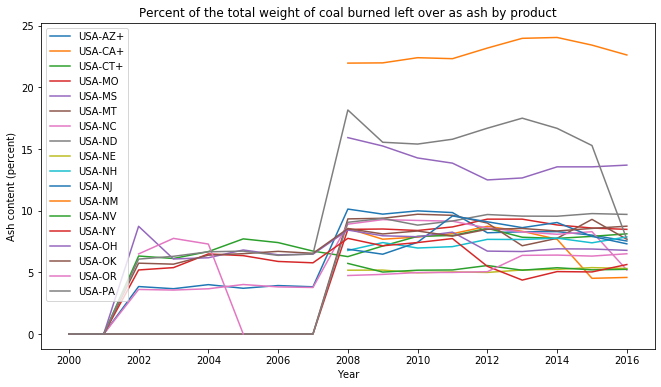

In [67]:
### lets try and get scatterplot to lay on top of each
import matplotlib.pyplot as plt
x = np.arange(2000,2017)

fig, axs = plt.subplots()
fig.set_size_inches(11,6)
for col in ash_anual_groupy.columns:
    axs.plot(x,ash_anual_groupy[col],label=col[:7])
axs.legend()
axs.set_title('Percent of the total weight of coal burned left over as ash by product')
axs.set_xlabel('Year')
axs.set_ylabel('Ash content (percent)')
plt.savefig('images/ugly-coal-ash2.png');

**WHat happend in 2008??:**
 https://www.eia.gov/coal/review/pdf/feature08.pdf
 - There was a change over in presidents which  may have changed some regulations on the cleanlyness of coal or even how the ash byproduct is reported

upon inspection it looks like i filtered out some state when i only included rows that did not have nans in the iso6133 column. Lets try this gain and use the geography column that has region and states

In [68]:
coal_ash_df = df[df['name'].str.match('Ash content')]
fill_data_vals( coal_ash_df);

/home/rachel/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/rachel/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [69]:
# just name and state
coal_ash_df_1= coal_ash_df.filter(items=['name','geography'])
#just year columns
coal_ash_df_2 = coal_ash_df.iloc[:,-86:]
# concatinating the two sets of columns to get only useful info
ash_anual_state_df = coal_ash_df_1.join(coal_ash_df_2)
# filtering for just anual data. The new way!
anual_cols = [c for c in ash_anual_state_df.columns if not 'Q' in c]
#lets sort the years while we are at it
ash_anual_state_df = ash_anual_state_df[sorted(anual_cols)]
ash_anual_state_df.shape

(120, 19)

In [70]:
ash_anual_state = ash_anual_state_df['geography'].dropna()

### this made a really crouded and ugly plot so i am sticking with the one with less states in it

But., lets see if we can make it better with a scatter

Text(0, 0.5, 'Ash content (percent)')

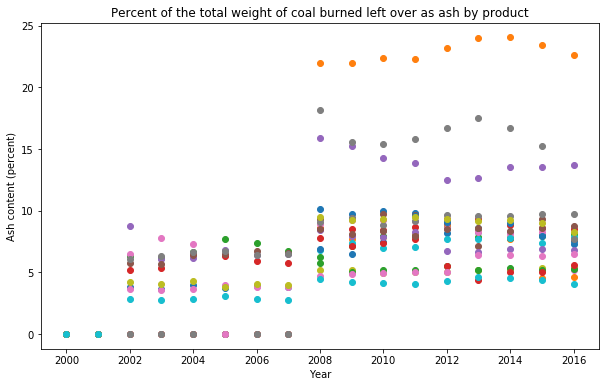

In [94]:
### lets try and get scatterplot to lay on top of each
x = np.arange(2000,2017)

fig, axs = plt.subplots()
fig.set_size_inches(10,6)
for col in ash_anual_groupy.columns:
    axs.plot(x,ash_anual_groupy[col],'o')
#axs.legend()
axs.set_title('Percent of the total weight of coal burned left over as ash by product')
axs.set_xlabel('Year')
axs.set_ylabel('Ash content (percent)')
#plt.savefig('images/ave-coal-ash.png');

Iwant to add an average average line

In [95]:
ash_anual_groupy['mean'] = ash_anual_groupy.mean(axis=1)
ash_anual_groupy['stdev'] = ash_anual_groupy.std(axis=1)

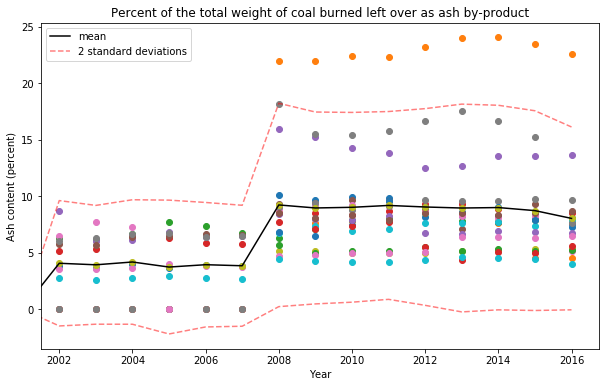

In [96]:
x = np.arange(2000,2017)

fig, axs = plt.subplots()
fig.set_size_inches(10,6)
for col in ash_anual_groupy.columns:
    axs.plot(x,ash_anual_groupy[col],'o')
#axs.legend()
axs.set_title('Percent of the total weight of coal burned left over as ash by-product')
axs.set_xlabel('Year')
axs.set_ylabel('Ash content (percent)')

axs.plot(x,ash_anual_groupy['mean'],color='k',label='mean')
axs.plot(x,ash_anual_groupy['mean']+2*ash_anual_groupy['stdev'],'--',color='r',label='2 standard deviations',alpha=.5)
axs.plot(x,ash_anual_groupy['mean']-2*ash_anual_groupy['stdev'],'--',color='r',alpha=.5)
plt.xlim(2001.5,2016.75)
plt.legend()
#plt.savefig('images/ave-coal-ash3.png')

## Lets look at one region and go a little deeper

In [79]:
# deeper dive into mountain region
mountain_ash = ash_anual_state_df[ash_anual_state_df['name'].str.contains('Mountain')]


In mountain ash data frame there is a row for ash percent per year in each sector

In [ ]:
Lets see which sectors are dirtier

Lets make the sectors into columns and the years into rows for quick sector refernce and change the index to the name column


In [80]:
mountain_ash = mountain_ash.reset_index().set_index('name')
# and lets drop the "index" column and geography column
mountain_ash.drop(['index',"geography"],axis=1,inplace=True)

In [81]:
mountain_ash = mountain_ash.T
mountain_ash.head(16)

name,Ash content : Mountain (total) : electric utility : annual,Ash content : Mountain (total) : electric utility : quarterly,Ash content : Mountain (total) : other industrial : annual,Ash content : Mountain (total) : other industrial : quarterly,Ash content : Mountain (total) : electric utility non-cogen : annual,Ash content : Mountain (total) : electric utility cogen : annual,Ash content : Mountain (total) : commercial and institutional : annual,Ash content : Mountain (total) : independent power producers (total) : annual,Ash content : Mountain (total) : independent power producers (total) : quarterly,Ash content : Mountain (total) : electric power (total) : quarterly
2000,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN
2001,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN
2002,NaN,NaN,7.69,NaN,NaN,NaN,0.00,NaN,NaN,NaN
2003,NaN,NaN,7.34,NaN,NaN,NaN,0.00,NaN,NaN,NaN
2004,NaN,NaN,8.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN
2005,NaN,NaN,7.41,NaN,NaN,NaN,0.00,NaN,NaN,NaN
2006,NaN,NaN,7.85,NaN,NaN,NaN,0.00,NaN,NaN,NaN
2007,NaN,NaN,7.65,NaN,NaN,NaN,0.00,NaN,NaN,NaN
2008,11.010610,NaN,8.17,NaN,10.540232,10.97,9.52,10.548918,NaN,NaN
2009,11.219591,NaN,7.91,NaN,10.595096,9.16,8.85,10.560674,NaN,NaN


In [87]:
for c in mountain_ash.columns:
    print(c)

Ash content : Mountain (total) : electric utility : annual
Ash content : Mountain (total) : electric utility : quarterly
Ash content : Mountain (total) : other industrial : annual
Ash content : Mountain (total) : other industrial : quarterly
Ash content : Mountain (total) : electric utility non-cogen : annual
Ash content : Mountain (total) : electric utility cogen : annual
Ash content : Mountain (total) : commercial and institutional : annual
Ash content : Mountain (total) : independent power producers (total) : annual
Ash content : Mountain (total) : independent power producers (total) : quarterly
Ash content : Mountain (total) : electric power (total) : quarterly


In [92]:
# columns to compair for graph (because of all the nans i am going to look at only the last 8 years)
cols = ['Ash content : Mountain (total) : electric utility cogen : annual',
'Ash content : Mountain (total) : electric utility non-cogen : annual', 
'Ash content : Mountain (total) : other industrial : annual',
'Ash content : Mountain (total) : commercial and institutional : annual',
'Ash content : Mountain (total) : independent power producers (total) : annual']#,
#'Ash content : Mountain (total) : independent power producers (total) : annual']

labels = ['electric utility cogen','electric utility non-cogen','other industrial','commercial and institutional','independent power producers']#,'electric power (total)']

x = [2008,2009,2010,2011,2012,2013,2014,2015,2016]

NOTE: if below cell doesnt work, the above cell that transposes the df was ran to many time. run it again ONCE, then re run below cell

''

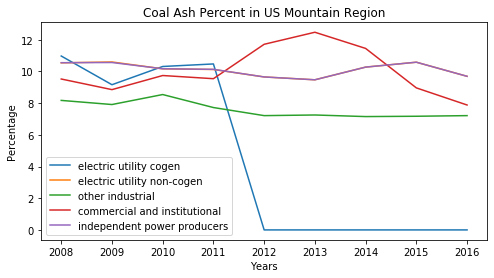

In [93]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots()
fig.set_size_inches(8,4)

for i, column in enumerate(cols):
    axs.plot(x,mountain_ash[column][-9:],label = labels[i])
    

axs.legend()
axs.set_title('Coal Ash Percent in US Mountain Region')
axs.set_ylabel('Percentage')
axs.set_xlabel('Years')
#plt.savefig('images/mountain-ash.png')
;

There are few few things worth noting in this graph. On first inspection "electric utility non-cogen" appears to be missing. Upon further inspection of the data table I saw that non-cogen utility and independent power measurments of ash ar almost exactly the same every year. This make me wonder if almost all independant power producers do not use cogeneration technologies. Also reporting on electric utility plants seems to have stopped in 2012 because all values drop to zero. As a summary I would say that independant power producers, electric utility and other industrial are are not burning coal any cleaner since recording started, but the commercial and industrial is making some changes and I would love to see data in the more recient years. (Remember this is only for the mountain region of the us)

**Ash content may not be very revieling because of the poor reporting practices . Lets look at CO2 from coal burning over the years**

In [100]:
#.## reading in TOTAL.json
total_df = json_read(path+'TOTAL.json')
total_df.shape

(1000, 7)

In [101]:
#expanding the data dictionary into its own columns

total_all_keys = all_keys(total_df)  # all possible yea values (years)
total_data_df = data_to_df(total_all_keys,total_df) # creates a data_df filled with zeros with cols=allkeys.
total_new_df = concat_to_df(total_df,total_data_df)  # concats the data_df to the main df
totals = fill_data_vals(total_new_df)

In [113]:
totals.shape

(1000, 609)

In [104]:
#totals


In [114]:
# parsing  for the coal rows

coal_totals = totals[totals['name'].str.contains('Coal')]

In [115]:
coal_totals.iloc[15:,:]

,name,units,f,start,end,last_updated,data,200102,1987,198601,...,197701,201703,199203,199006,201007,199202,199904,200810,198403,197406
230,"Coal Stocks, Industrial Sector, Coke Plants, E...",Thousand Short Tons,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 1648.13, '201703': 1387.757, '20170...",1765.86,0,3302.24,...,8190,1387.76,2875.32,3739.11,1948.12,2841.31,1956.98,2090.91,6149.36,7473
231,"Coal Stocks, Industrial Sector, Other, End of ...",Thousand Short Tons,A,1949,2016,2017-07-26T11:59:01-04:00,"{'2016': 3635.143, '2015': 4381.526, '2014': 4...",0,10777.5,0,...,0,0,0,0,0,0,0,0,0,0
232,"Coal Stocks, Industrial Sector, Other, End of ...",Thousand Short Tons,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 5031.395, '201703': 3219.679, '2017...",4412.59,0,9930.42,...,7430,3219.68,5725.11,7413.43,4345.39,6170.5,4716.17,5474.57,8359,8489
233,"Coal Consumption, Annual",Trillion Btu,A,1949,2016,2017-07-26T11:59:01-04:00,"{'2016': 14226.519, '2015': 15548.87, '2014': ...",0,18008.5,0,...,0,0,0,0,0,0,0,0,0,0
234,"Coal Consumption, Monthly",Trillion Btu,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 942.775, '201703': 1038.644, '20170...",1731.66,0,1628.38,...,1266.43,1038.64,1555.24,1604.92,1998.57,1496.09,1637.06,1736.71,1402.84,1014.43
254,"Coal Stocks, End-Use Sectors Total, End of Per...",Thousand Short Tons,A,1949,2016,2017-07-26T11:59:01-04:00,"{'2016': 5671.134, '2015': 7011.963, '2014': 7...",0,14661.8,0,...,0,0,0,0,0,0,0,0,0,0
255,"Coal Residential Sector CO2 Emissions, Monthly",Million Metric Tons of Carbon Dioxide,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 'NA', '201703': 'NA', '201702': 'NA...",0.108,0,0.447,...,0.754,NA,0.212,0.166,NA,0.234,0.114,NA,0.269,0.41
256,"Coal Consumed by the Residential Sector, Monthly",Thousand Short Tons,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 'NA', '201703': 'NA', '201702': 'NA...",45.41,0,205.311,...,344.4,NA,94.645,74.607,NA,104.796,50.334,NA,123.893,191.04
257,"Coal Stock Change, Annual",Thousand Short Tons,A,1949,2016,2017-07-26T11:59:01-04:00,"{'2016': -35114.929, '2015': 40703.74, '2014':...",0,6460.76,0,...,0,0,0,0,0,0,0,0,0,0
258,"Coal Stock Change, Monthly",Thousand Short Tons,M,197301,201706,2017-07-26T11:59:01-04:00,"{'201706': 'NA', '201705': 'NA', '201704': 495...",3823.55,0,-3292.51,...,-12906.6,2105.55,3769.43,-138.268,-15499.3,4390.62,4411.35,13226.4,4777.43,-217.582


In [116]:
# lets sub set this even more
#creating a table of the rows that have to do woth coal emission
CO2_coal = coal_totals[coal_totals['name'].str.contains('CO2')]

In [117]:
CO2_coal.head(3)

,name,units,f,start,end,last_updated,data,200102,1987,198601,...,197701,201703,199203,199006,201007,199202,199904,200810,198403,197406
255,"Coal Residential Sector CO2 Emissions, Monthly",Million Metric Tons of Carbon Dioxide,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 'NA', '201703': 'NA', '201702': 'NA...",0.108,0,0.447,...,0.754,NA,0.212,0.166,NA,0.234,0.114,NA,0.269,0.41
301,"Coal Coke Net Imports CO2 Emissions, Monthly",Million Metric Tons of Carbon Dioxide,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': -0.154, '201703': -0.17500000000000...",0.219,0,-0.005,...,-0.187,-0.175,0.373,0.082,0.014,0.285,1.069,0.101,-0.111,0.385
324,"Coal Commercial Sector CO2 Emissions, Monthly",Million Metric Tons of Carbon Dioxide,M,197301,201704,2017-07-26T11:59:01-04:00,"{'201704': 0.1, '201703': 0.23800000000000002,...",0.872,0,1.497,...,1.939,0.238,0.964,0.663,0.456,1.067,0.84,0.594,1.147,0.872


In [118]:
#put the thing down, flip it, and reverse it

#droping some columns, making name clumn the index and transposing
CO2_coal = CO2_coal.drop(['units', 'data','last_updated', 'f','start','end'], axis=1).set_index('name').T
#sorting by year
CO2_coal = CO2_coal.sort_index(axis=0)

In [119]:
CO2_coal.columns

Index(['Coal Residential Sector CO2 Emissions, Monthly',
       'Coal Coke Net Imports CO2 Emissions, Monthly',
       'Coal Commercial Sector CO2 Emissions, Monthly',
       'Coal, Including Coal Coke Net Imports, CO2 Emissions, Annual',
       'Coal, Including Coal Coke Net Imports, CO2 Emissions, Monthly',
       'Coal Transportation Sector CO2 Emissions, Monthly',
       'Coal Electric Power Sector CO2 Emissions, Monthly',
       'Coal Industrial Sector CO2 Emissions, Annual',
       'Coal Industrial Sector CO2 Emissions, Monthly'],
      dtype='object', name='name')

In [ ]:
#CO2_coal

In [120]:
#picking the columns i want to compair
cols = ['Coal Residential Sector CO2 Emissions, Monthly','Coal Commercial Sector CO2 Emissions, Monthly',
        'Coal Transportation Sector CO2 Emissions, Monthly','Coal Industrial Sector CO2 Emissions, Monthly']
CO2_all = CO2_coal[cols]
CO2_all

name,"Coal Residential Sector CO2 Emissions, Monthly","Coal Commercial Sector CO2 Emissions, Monthly","Coal Transportation Sector CO2 Emissions, Monthly","Coal Industrial Sector CO2 Emissions, Monthly"
1949,0,0,0,0
1950,0,0,0,0
1951,0,0,0,0
1952,0,0,0,0
1953,0,0,0,0
...,...,...,...,...
201702,NA,0.219,0,9.254
201703,NA,0.238,0,9.401
201704,NA,0.1,0,8.339
201705,0,0,0,0


In [ ]:
#CO2_all

In [112]:
CO2_coal['Coal Residential Sector CO2 Emissions, Monthly'].count()

602

In [121]:
from helper import clean_column

In [122]:
# this clean column function below takes in a datafaram and the name of a column
#   and replaces the string 'Na' with nans , drops those nans .
#   it also takes out the rows whiish it does have values for for instance when 
#   a columns data is reported anually there will be a bunch of zeros i the quarterly rows.
#    this function return a dataframe of one column that can be easily ploted


res = clean_column(CO2_all,'Coal Residential Sector CO2 Emissions, Monthly')

In [123]:
res

,index,"Coal Residential Sector CO2 Emissions, Monthly"
25,197301,1.136
26,197302,0.973
27,197303,0.764
28,197304,0.500
29,197305,0.508
...,...,...
474,200708,0.052
475,200709,0.047
476,200710,0.064
477,200711,0.076


In [128]:
# making x and y values for my residential coal emissions plot
x = res['index']
y_res =res['Coal Residential Sector CO2 Emissions, Monthly']

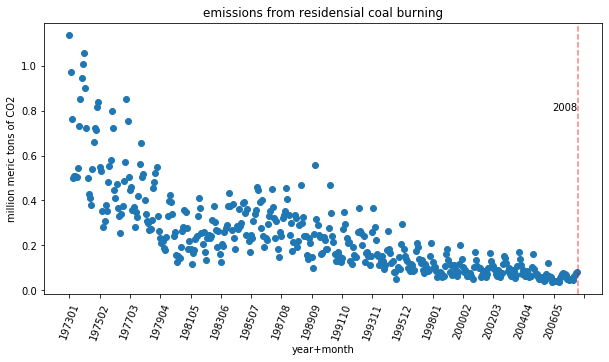

In [154]:
fig, axs = plt.subplots()
fig.set_size_inches(10,5)

axs.plot(x,y_res,'o')
axs.set_title('emissions from residensial coal burning')
axs.set_xlabel('year+month')
axs.set_ylabel('million meric tons of CO2')
#axs.set_xticks(rotation=90)
axs.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xticks(rotation=70)
axs.axvline('2008',color='r',linestyle='--',alpha=0.5)
axs.text('200604',.8,'2008')
plt.savefig('images/residential_coal_burning2.png')

**There is an obvious downword trend since the 1950, but lets take a closer look in to the 2000s to compare to our coal ash data.**


In [131]:
len(res)

420

In [134]:
res_2000s = res[res['index'].str.startswith('20')]

In [135]:
len(res_2000s)

96

In [ ]:
res_2000s[-20:]

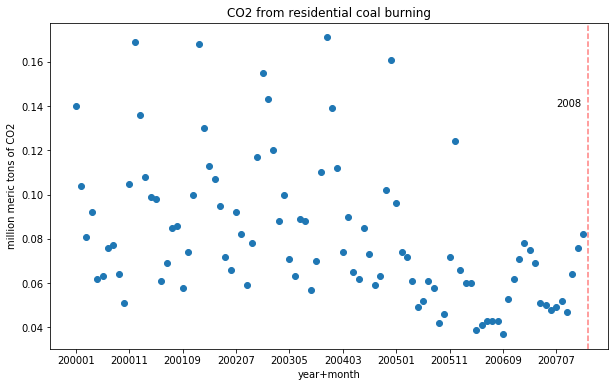

In [153]:
fig, axs = plt.subplots()
fig.set_size_inches(10,6)

axs.plot(res_2000s['index'],res_2000s['Coal Residential Sector CO2 Emissions, Monthly'],'o')
axs.set_title('CO2 from residential coal burning')
axs.set_xlabel('year+month')
axs.set_ylabel('million meric tons of CO2')
#axs.set_xticklabels(res_2000s.index, rotation=90);
axs.xaxis.set_major_locator(plt.MaxNLocator(12))
axs.axvline('2008',color='r',linestyle='--',alpha=0.5)
axs.text('200707',.14,'2008')
plt.savefig('images/co2_res_2000b.png')

**The red dashed line is right at 2008** once again the reporting has drastically changed. 

Lets look at CO2 from other coal burning sectors.

In [156]:
CO2_from_electric = clean_column(CO2_coal,'Coal Electric Power Sector CO2 Emissions, Monthly')

In [157]:
CO2_from_electric

,index,"Coal Electric Power Sector CO2 Emissions, Monthly"
25,197301,72.076
26,197302,64.442
27,197303,64.084
28,197304,60.842
29,197305,61.798
...,...,...
595,201612,118.867
596,201701,116.336
597,201702,88.144
598,201703,89.622


''

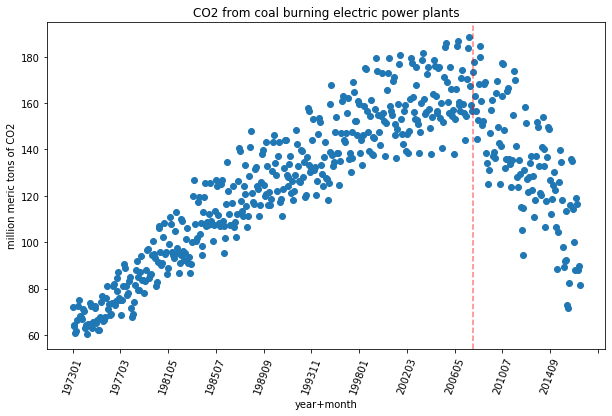

In [163]:
fig, axs = plt.subplots()
fig.set_size_inches(10,6)

axs.plot(CO2_from_electric['index'],CO2_from_electric['Coal Electric Power Sector CO2 Emissions, Monthly'],'o')
axs.set_title('CO2 from coal burning electric power plants')
axs.set_xlabel('year+month')
axs.set_ylabel('million meric tons of CO2')
#axs.set_xticklabels(res_2000s.index, rotation=90);
axs.xaxis.set_major_locator(plt.MaxNLocator(12))
axs.axvline('200712',color='r',linestyle='--',alpha=0.5);
plt.xticks(rotation=70)
plt.savefig('images/co2_coal_electric5.png');
;

**This look like reporting in the sector was good. and right at 2008 emission droped drastically. This is very exciting.**

lets see what else is in our totals.json

In [164]:
#put the thing down flip it and reverse it

#droping some columns, making name clumn the index and transposing
wind_df = totals[totals['name'].str.contains('Wind')].drop([ 'data','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)

In [165]:
wind_df.head(20)

name,"Wind Energy Consumed by the Commercial Sector, Monthly","Wind Energy Consumed by the Electric Power Sector, Monthly","Electricity Net Generation From Wind, Electric Power Sector, Monthly","Electricity Net Generation From Wind, All Sectors, Monthly","Wind Energy Consumed by the Industrial Sector, Monthly","Wind Energy Consumption/Production, Monthly","Wind Energy Consumed by the Electric Power Sector, Annual","Electricity Net Generation From Wind, Electric Power Sector, Annual","Electricity Net Generation From Wind, All Sectors, Annual","Wind Energy, Adjustment for Fossil Fuel Equivalence, Annual","Wind Energy, Transformed Into Electricity, Annual","Wind Energy Consumption/Production, Annual"
1949,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1950,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1951,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1952,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1953,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1954,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1955,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1956,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1957,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA
1958,0,0,0,0,0,0,NA,NA,NA,NA,NA,NA


There are alot of nans and zeros becacause are data starts in the 1950s. lets look at the 2000s

In [166]:
wind_2000s = wind_df[wind_df.index.str.startswith('20')]


In [180]:
#wind power df
wind_2000s = wind_2000s[wind_2000s['Wind Energy Consumption/Production, Monthly']>0]


In [181]:
#solar power from 2000s
solar_df = totals[totals['name'].str.contains('Solar')].drop([ 'data','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)
solar_2000s = solar_df[solar_df.index.str.startswith('20')]
solar_2000s = solar_2000s[solar_2000s['Solar/PV Energy Consumption/Production, Monthly']>0]

In [187]:
#uclear power in the 2000s
nuclear_df = totals[totals['name'].str.contains('Nuclear')].drop([ 'data','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)
nuclear_2000s = nuclear_df[nuclear_df.index.str.startswith('20')]
#totals[totals['name'].str.contains('Nuclear')]
nuclear_2000s = nuclear_2000s[nuclear_2000s['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly']>0]


In [183]:
#hydroelectric powe in the 2000s
hydro_df = totals[totals['name'].str.contains('Hydroelectric')].drop([ 'data','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)
hydro_2000s = hydro_df[hydro_df.index.str.startswith('20')]
hydro_2000s = hydro_2000s[hydro_2000s['Hydroelectric Power Consumption/Production, Monthly']>0]

In [184]:
# creating a sub df of geothermal energy in the 2000s
geotherm_df = totals[totals['name'].str.contains('Geothermal')].drop([ 'data','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)
geotherm_2000s = geotherm_df[geotherm_df.index.str.startswith('20')]
geotherm_2000s = geotherm_2000s[geotherm_2000s['Geothermal Energy Consumption/Production, Monthly']>0]

checking for other formes of reneable energy. I am perposly leaving out "biomass burning" becasue resent studies show that it is not good for the environmanet

In [172]:
#checking for other clean energy in the dataframe
totals[totals['name'].str.contains('Tidal')]

,name,units,f,start,end,last_updated,data,200102,1987,198601,...,197701,201703,199203,199006,201007,199202,199904,200810,198403,197406


In [ ]:
totals[totals['name'].str.contains('Ocean')]

In [ ]:
totals[totals['name'].str.contains('Wave')]

(208, 12)

In [178]:
wind_2000s.shape

(227, 12)

In [185]:

#create x and y for wind
x = wind_2000s.index
y_wind = wind_2000s['Wind Energy Consumption/Production, Monthly'] 
#wind_2000s.columns

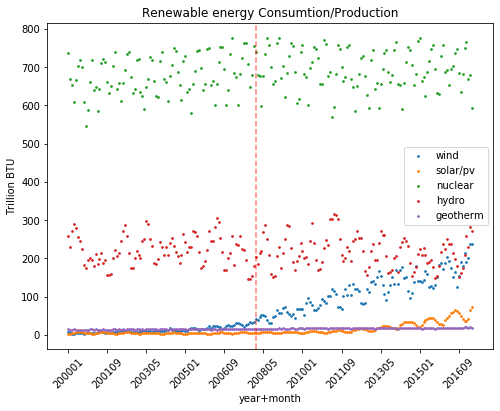

In [191]:
fig, axs = plt.subplots()
fig.set_size_inches(8,6)

marker_size = 3
axs.scatter(x,y_wind,label='wind',s=marker_size)
axs.scatter(x,solar_2000s['Solar/PV Energy Consumption/Production, Monthly'],label='solar/pv',s=marker_size)
axs.scatter(x,nuclear_2000s['Nuclear Electric Power Consumption/Production, Monthly'],label='nuclear',s=marker_size)
axs.scatter(x,hydro_2000s['Hydroelectric Power Consumption/Production, Monthly'],label='hydro',s=marker_size)
axs.scatter(x,geotherm_2000s['Geothermal Energy Consumption/Production, Monthly'],label='geotherm',s=marker_size)

axs.set_title('Renewable energy Consumtion/Production')
axs.set_xlabel('year+month')
axs.set_ylabel('Trillion BTU')
#axs.set_xticklabels(res_2000s.index, rotation=90);
axs.xaxis.set_major_locator(plt.MaxNLocator(12))
axs.axvline('200801',color='r',linestyle='--',alpha=0.5);
plt.xticks(rotation=45)
plt.legend()
#axs.axhline(0,color='k')
#plt.savefig('renewable_production.png');

In [ ]:
geotherm_2000s.columns


Lets compare coal for electric power and nuclear for electric power

In [ ]:
nuclear_2000s.head(20)

(208, 8)

In [ ]:
#nuc_to_electric
nuc_to_electric = nuclear_2000s['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly']

In [ ]:
type(nuc_to_electric)

In [ ]:
# lets just try taking out the zeros
nuc_to_electric = nuc_to_electric[nuc_to_electric !=0]

In [ ]:
nuc_to_electric.index


In [ ]:
pd.to_datetime(nuc_to_electric.index,format='%Y%m')

In [ ]:
nuc_to_electric.index  =pd.to_datetime(nuc_to_electric.index,format='%Y%m')

In [ ]:
nuc_to_electric = nuc_to_electric.reset_index()
#nuc_to_electric

In [ ]:
nuc_to_electric['year'] = nuc_to_electric['index'].dt.year
nuc_to_electric['month'] = nuc_to_electric['index'].dt.month

In [ ]:
#nuc_to_electric

In [ ]:
nuc_to_electric['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly'] =nuc_to_electric['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly'].astype(float) 

In [ ]:
#nuc_to_electric.info()


In [ ]:
nuc_ave_month = nuc_to_electric.groupby(['month']).mean()

In [ ]:
#nuc_ave_month.head(3)

In [ ]:
#lets do the same for coal to electric
coal_totals
coal_df = coal_totals.drop([ 'data','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)
coal_2000s = coal_df[coal_df.index.str.startswith('20')]
coal_2000s['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly']

In [ ]:
coal_to_electric = coal_2000s['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly']
coal_to_electric = coal_to_electric[coal_to_electric !=0]
coal_to_electric.index  =pd.to_datetime(coal_to_electric.index,format='%Y%m')
coal_to_electric = coal_to_electric.reset_index()
coal_to_electric['year'] = coal_to_electric['index'].dt.year
coal_to_electric['month'] = coal_to_electric['index'].dt.month
coal_to_electric['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly'] =coal_to_electric['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly'].astype(float)
coal_ave_month = coal_to_electric.groupby(['month']).mean()

In [ ]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(9,3.5)

ticks =['Jan','Feb','March','Aprl','May','June','July','Aug','Sep','Oct','Nov','Dec']
axs[0].bar(coal_ave_month.index,coal_ave_month['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly'],label='coal',align='center',tick_label=ticks)
axs[0].set_title('Dirty                              ')


axs[1].set_title('                              clean')
axs[1].bar(nuc_ave_month.index, nuc_ave_month['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly'],label='Nuclear',align='center',tick_label=ticks)

axs[0].legend()
axs[1].legend()
fig.suptitle('average monthly production',size=16)
axs[0].set_ylabel('Trillion BTUs')
plt.xticks(rotation=70)
plt.tight_layout();


In [ ]:
fig, axs = plt.subplots()
fig.set_size_inches(10,4)

ticks =['Jan','Feb','March','Aprl','May','June','July','Aug','Sep','Oct','Nov','Dec']
axs.bar(coal_ave_month.index,coal_ave_month['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly'],label='coal',align='center',tick_label=ticks)
#axs.set_title('Dirty                              ')


#axs[1].set_title('                              clean')
axs.bar(nuc_ave_month.index, nuc_ave_month['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly'],label='Nuclear',align='center',tick_label=ticks)

#axs[0].legend()
axs.legend()
axs.set_title('Average monthly production (17 years)',size=16)
axs.set_ylabel('Trillion BTUs')
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('17yr-monthly-coal-nuc.png');


In [ ]:
ave_coal_1year = coal_ave_month[coal_ave_month['year']==2017]
ave_nuc_1year = nuc_ave_month[nuc_ave_month['year']==2017]

In [ ]:
coal_ave_month

In [ ]:
# taking just nuclear averageing my month in 2016
nuclear_2016 = nuclear_df[nuclear_df.index.str.startswith('2016')]
nuc_to_electric2 = nuclear_2016['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly']
nuc_to_electric2 = nuc_to_electric2[nuc_to_electric2 !=0]
nuc_to_electric2.index  =pd.to_datetime(nuc_to_electric2.index,format='%Y%m')
nuc_to_electric2 = nuc_to_electric2.reset_index()
nuc_to_electric2['year'] = nuc_to_electric2['index'].dt.year
nuc_to_electric2['month'] = nuc_to_electric2['index'].dt.month
nuc_to_electric2['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly'] =nuc_to_electric2['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly'].astype(float) 
nuc_ave_month2 = nuc_to_electric2.groupby(['month']).mean()

nuc_ave_month2



In [ ]:
#coal 2016
coal_2016 = coal_df[coal_df.index.str.startswith('2016')]
coal_2016['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly']
coal_to_electric2 = coal_2016['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly']
coal_to_electric2 = coal_to_electric2[coal_to_electric2 !=0]
coal_to_electric2.index  =pd.to_datetime(coal_to_electric2.index,format='%Y%m')
coal_to_electric2 = coal_to_electric2.reset_index()
coal_to_electric2['year'] = coal_to_electric2['index'].dt.year
coal_to_electric2['month'] = coal_to_electric2['index'].dt.month
coal_to_electric2['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly'] =coal_to_electric2['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly'].astype(float)
coal_ave_month2 = coal_to_electric2.groupby(['month']).mean()
coal_ave_month2

In [ ]:
fig, axs = plt.subplots()
fig.set_size_inches(9,3.5)

ticks =['Jan','Feb','March','Aprl','May','June','July','Aug','Sep','Oct','Nov','Dec']
axs.bar(coal_ave_month2.index,coal_ave_month2['Coal Consumption for Electricity Generation, Electric Power Sector, Monthly'],label='coal',align='center',tick_label=ticks)


axs.bar(nuc_ave_month2.index, nuc_ave_month2['Nuclear Electric Power Consumed by the Electric Power Sector, Monthly'],label='Nuclear',align='center',tick_label=ticks)


axs.legend()
axs.set_title('average monthly production 2016',size=16)
axs.set_ylabel('Trillion BTUs')
plt.xticks(rotation=70)
#plt.tight_layout();
plt.savefig('2016-coal-nuc.png')

**moving on to percentages of clean and dirty energy per year**

TOTAL ENERGY colums from total.json
 - Total Energy Consumed by the Transportation Se...(these are all annual)
 - Total Energy Consumed by the Transportation Se...
 - Total Energy Consumed by the Commercial Sector...
 - Total Energy Consumed by the Commercial Sector...
 - Total Energy Consumed by the Industrial Sector...
 - Total Energy Consumed by the Industrial Sector...
 - Total Energy Consumed by the Residential Secto...
 - Total Energy Consumed by the Residential Secto...

TOTAL CLEAN ENERGY columns from total.json<br>
*note: eia considers renewables to be: solar, wind, hydro, geothermal other*
 - Total Renewable Energy Consumption, Annual 	Trillion Btu
 - Nuclear Electric Power Consumption/Production,.  monthly

In [ ]:
# making a total_energy df
total_energy = totals[(totals['name'].str.contains('Total Energy Consumed by the')) &(totals['name'].str.contains('Annual'))]
totals_df= total_energy.drop([ 'data','units','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)
totals_df = totals_df[totals_df !=0]
totals_df.dropna(axis=0,how='all',inplace=True)
totals_df['Total Energy'] = totals_df[list(totals_df.columns)].sum(axis=1)
totals_df.index.dtype

In [ ]:
# data frame of anual nuclear energy
total_nuc = totals[totals['name'].str.contains('Nuclear Electric Power Consumption/Production')]
total_nuc = total_nuc.drop([ 'data','units','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)

total_nuc = total_nuc[total_nuc.index.str.len() > 4]
total_nuc.index  = pd.to_datetime(total_nuc.index,format='%Y%m')
total_nuc = total_nuc.reset_index()

total_nuc['year'] = total_nuc['index'].dt.year
total_nuc['month'] = total_nuc['index'].dt.month
total_nuc.drop(['index','month'],axis=1,inplace=True)

total_nuc = total_nuc.groupby('year').sum()
total_nuc['Total Nuclear'] = total_nuc['Nuclear Electric Power Consumption/Production, Monthly']
total_nuc.drop('Nuclear Electric Power Consumption/Production, Monthly',axis=1,inplace=True)
total_nuc.index.rename('year',inplace=True)
total_nuc.head()

In [ ]:
total_nuc.shape

In [ ]:
total_nuc.index = total_nuc.index.map(str)
total_nuc.index.dtype

In [ ]:
# df of total renewable consumtion
total_renew = totals[totals['name'].str.contains('Total Renewable Energy Consumption, Annual')]
total_renew = total_renew.drop([ 'data','units','last_updated', 'f','start','end'], axis=1).set_index('name').T.sort_index(axis=0)
total_renew = total_renew[total_renew.index.str.len() == 4]
total_renew = total_renew.reset_index()
total_renew['Total Renewable'] = total_renew['Total Renewable Energy Consumption, Annual']
total_renew.drop('Total Renewable Energy Consumption, Annual',axis=1, inplace=True)
total_renew = total_renew.set_index('index')
total_renew.index.rename('year',inplace=True)
#total_renew.index.astype('Int64')
total_renew.index.dtype



In [ ]:
# I am goin to left join everthing to nuclear data set becasue it is recorded only after 1979 as opposed to the other df who start reporting at 1949
total_clean = total_nuc.join(total_renew,how='inner')
totals_df = totals_df.join(total_clean,how='inner')


In [ ]:
totals_df['Total Clean'] = totals_df['Total Nuclear'] + totals_df['Total Renewable']
totals_df['Percent Clean'] = totals_df['Total Clean']/totals_df['Total Energy']
totals_df

In [ ]:
#Lets see how it looks
import matplotlib.pyplot as plt

fig, axs = plt.subplots()
fig.set_size_inches(8,3)
x = totals_df.index
y = totals_df['Percent Clean']
axs.plot(x,y)
plt.title('Percent of our US energy consumtion from clean energy')
axs.xaxis.set_major_locator(plt.MaxNLocator(16))
plt.xticks(rotation=70)
#plt.tight_layout();
plt.savefig('percent-clean.png')
;